<a href="https://colab.research.google.com/github/paragnayak/Data-Science/blob/master/Instant_Gratification_Mukul_Sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

This is an anonymized, binary classification dataset found on a USB stick that washed ashore in a bottle. There was no data dictionary with the dataset, but this poem was handwritten on an accompanying scrap of paper:

Silly column names abound, 
but the test set is a mystery. 
Careful how you pick and slice, 
or be left behind by history.

In [0]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Instant Gratification/train.csv')

In [0]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Instant Gratification/test.csv')

In [0]:
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,dorky-purple-kiwi-hint,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,1c13f2701648e0b0d46d8a2a5a131a53,-5.490030,0.593976,1.532732,-0.361234,-0.155282,-1.340582,1.626819,4.280084,-0.340155,-0.653070,2.817394,1.211543,-0.819354,-0.019935,0.634466,-1.604789,0.756771,0.451960,0.309252,-4.628353,-0.270163,-0.183827,0.099529,0.719685,-1.077965,-1.704726,0.263344,1.183083,-1.967262,-0.364729,-1.553005,0.667643,-1.647120,-0.118086,1.095897,-3.725086,0.571565,5.407131,1.599479,...,-0.007170,-0.723353,-0.317083,3.892687,0.732599,-0.829353,-1.281645,5.256029,0.484761,0.315440,-1.256456,-0.065537,0.243787,-0.085292,0.293226,-0.727176,-0.026991,-0.452266,1.733475,-0.511201,-0.913642,-2.237558,-1.607618,-0.497308,0.004124,-1.854472,1.499102,-0.701304,-0.573827,0.121455,0.386831,0.817764,-1.215121,0.238812,-0.507346,1.360599,-1.743894,1.412043,-0.562730,-0.237948
1,ba88c155ba898fc8b5099893036ef205,0.571698,0.495494,1.133975,-0.315875,-2.142458,-0.478650,-1.458941,0.977352,0.159189,0.425304,1.366214,-1.097810,-0.128929,-0.563375,-0.389307,-0.167991,0.314843,0.530220,-0.512497,0.526404,1.612939,-0.800211,0.692056,2.541566,0.290910,-0.726153,1.307040,0.964062,0.235339,3.553998,-0.769491,-1.706831,0.227793,-1.027914,1.359388,-1.296281,0.216550,0.166792,-1.361746,...,8.867017,0.145251,-2.429107,-1.994984,0.692641,-0.922336,-0.442788,-0.357402,0.606270,-0.144259,-0.019312,0.132073,-1.038829,-0.361597,-0.019181,0.656320,-0.029080,-0.263428,-1.674349,0.237658,-0.539413,3.683862,0.341788,0.321800,1.919056,-0.680074,-0.851474,-0.802017,1.984299,0.606214,-1.120400,-0.953432,0.266619,-2.088512,0.252637,-1.034676,-0.804765,0.639112,1.172667,-1.666513
2,7cbab5cea99169139e7e6d8ff74ebb77,0.478202,-1.429985,0.41

In [0]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB


In [0]:
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,-0.001629,0.008115,-0.001445,0.006434,0.013150,-0.016462,0.014498,0.000990,-0.004702,-0.010490,0.006592,-0.007705,0.010857,-0.011858,-0.005172,-0.012855,-0.003606,0.001209,0.007980,-0.005911,-0.000397,-0.000490,-0.013010,-0.000040,0.003882,-0.008507,-0.009352,0.007037,0.004091,-0.011576,...,-0.002381,-0.010963,0.005069,0.001779,0.011217,-0.000718,-0.008141,0.003521,0.011593,-0.011187,0.001626,0.000656,0

In [0]:
print(train.shape)
print(test.shape)

(262144, 258)
(131073, 257)


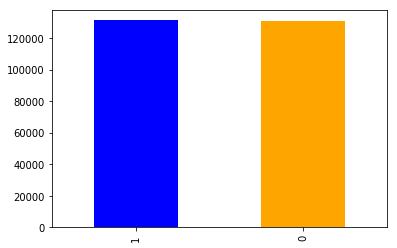

In [0]:
train.target.value_counts().plot(kind="bar", color=['blue','orange'])

In [0]:
train.columns


Index(['id', 'muggy-smalt-axolotl-pembus', 'dorky-peach-sheepdog-ordinal',
       'slimy-seashell-cassowary-goose',
       'snazzy-harlequin-chicken-distraction', 'frumpy-smalt-mau-ordinal',
       'stealthy-beige-pinscher-golden', 'chummy-cream-tarantula-entropy',
       'hazy-emerald-cuttlefish-unsorted', 'nerdy-indigo-wolfhound-sorted',
       ...
       'wheezy-myrtle-mandrill-entropy', 'wiggy-lilac-lemming-sorted',
       'gloppy-cerise-snail-contributor', 'woozy-silver-havanese-gaussian',
       'jumpy-thistle-discus-sorted', 'muggy-turquoise-donkey-important',
       'blurry-buff-hyena-entropy', 'bluesy-chocolate-kudu-fepid',
       'gamy-white-monster-expert', 'target'],
      dtype='object', length=258)

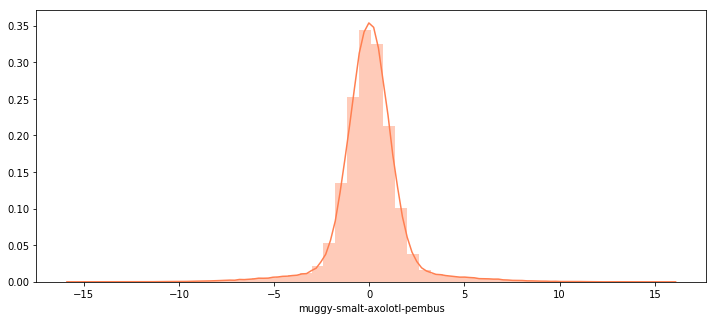

In [0]:
plt.figure(figsize=[12,5])
sns.distplot(train[train.columns[1]], color='coral')

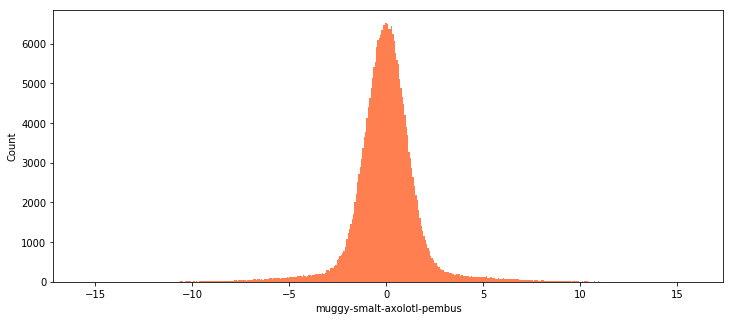

In [0]:
plt.figure(figsize=[12,5])
plt.hist(train[train.columns[1]], color='coral', bins = 450)
plt.xlabel(train.columns[1])
plt.ylabel('Count')
plt.show()

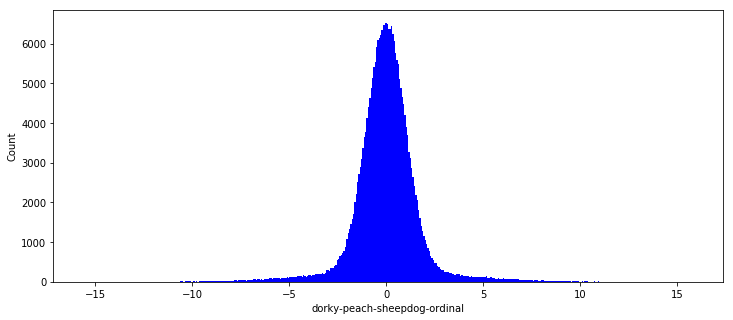

In [0]:
plt.figure(figsize=[12,5])
plt.hist(train[train.columns[1]], color='blue', bins = 450)
plt.xlabel(train.columns[2])
plt.ylabel('Count')
plt.show()

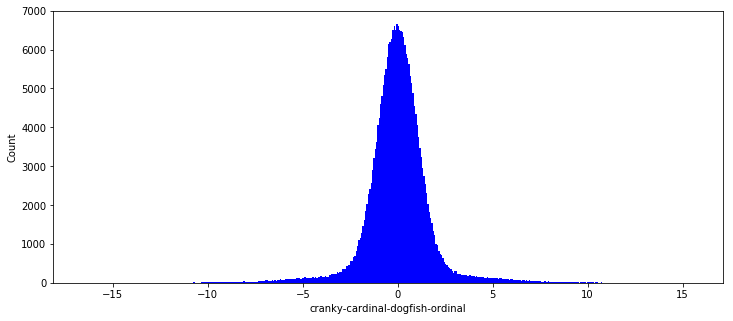

In [0]:
plt.figure(figsize=[12,5])
plt.hist(train[train.columns[21]], color='blue', bins = 450)
plt.xlabel(train.columns[21])
plt.ylabel('Count')
plt.show()

# Observations on Data Set

1) Most of the data is normal in nature and it assumes perfectly distributed with mean close to 0 and standard deviation close to 1.

2) There is a Perfect balance in the target variable and most of the features appear to be norm

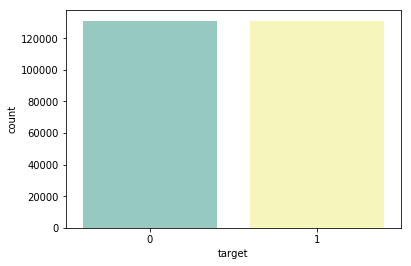

In [0]:
sns.countplot(x='target', data=train,palette='Set3')

In [0]:
df=[]

for i in train.columns:
  if (i not in train[['id','target']]):
    cols_split=i.split('-')
    # Make  A Dictionary
    
    split_cols={'Index':i,'Col1':cols_split[0],'Col2':cols_split[1],'Col3':cols_split[2],'Col4':cols_split[3]}
    
    df.append(split_cols)
  

In [0]:
colnames=pd.DataFrame(df)

In [0]:
colnames

,Col1,Col2,Col3,Col4,Index
0,muggy,smalt,axolotl,pembus,muggy-smalt-axolotl-pembus
1,dorky,peach,sheepdog,ordinal,dorky-peach-sheepdog-ordinal
2,slimy,seashell,cassowary,goose,slimy-seashell-cassowary-goose
3,snazzy,harlequin,chicken,distraction,snazzy-harlequin-chicken-distraction
4,frumpy,smalt,mau,ordinal,frumpy-smalt-mau-ordinal
5,stealthy,beige,pinscher,golden,stealthy-beige-pinscher-golden
6,chummy,cream,tarantula,entropy,chummy-cream-tarantula-entropy
7,hazy,emerald,cuttlefish,unsorted,hazy-emerald-cuttlefish-unsorted
8,nerdy,indigo,wolfhound,sorted,nerdy-indigo-wolfhound-sorted
9,leaky,amaranth,lizard,sorted,leaky-amaranth-lizard-sorted


In [0]:
colnames=colnames.set_index('Index')

In [0]:
colnames.head()

,Col1,Col2,Col3,Col4
Index,,,,
muggy-smalt-axolotl-pembus,muggy,smalt,axolotl,pembus
dorky-peach-sheepdog-ordinal,dorky,peach,sheepdog,ordinal
slimy-seashell-cassowary-goose,slimy,seashell,cassowary,goose
snazzy-harlequin-chicken-distraction,snazzy,harlequin,chicken,distraction
frumpy-smalt-mau-ordinal,frumpy,smalt,mau,ordinal


In [0]:
# Finding the unique values
print("The count of unique values in all the columns", colnames.nunique())

The count of unique values in all the columns Col1     85
Col2    103
Col3    173
Col4     26
dtype: int64


In [0]:
colnames.Col1.value_counts()[0:5]

beady     7
dorky     7
snazzy    7
gloppy    7
slimy     7
Name: Col1, dtype: int64

In [0]:
colnames.Col2.value_counts()[0:5]

tangerine    5
cream        5
auburn       5
copper       5
champagne    5
Name: Col2, dtype: int64

In [0]:
colnames.Col3.value_counts()[0:5]

sloth      4
eel        3
otter      3
whippet    3
maltese    3
Name: Col3, dtype: int64

In [0]:
colnames.Col4.value_counts()[0:5]

important      19
entropy        15
grandmaster    15
sorted         15
unsorted       15
Name: Col4, dtype: int64

In [0]:
# lets grill important
# Create a dataframe that has the word important
imp=colnames[colnames.Col4=='important'].index.tolist()

In [0]:
imp

['ugly-tangerine-chihuahua-important',
 'bumpy-amaranth-armadillo-important',
 'geeky-pumpkin-moorhen-important',
 'flimsy-chestnut-guppy-important',
 'chewy-myrtle-wasp-important',
 'clammy-scarlet-emu-important',
 'smelly-yellow-akbash-important',
 'foggy-denim-hyrax-important',
 'dorky-turquoise-maltese-important',
 'gloppy-mauve-bonobo-important',
 'wiggy-cinnamon-gecko-important',
 'nippy-jade-squirt-important',
 'woolly-cinnabar-schnauzer-important',
 'lanky-aqua-bullfrog-important',
 'sickly-denim-oriole-important',
 'blurry-green-dodo-important',
 'droopy-cardinal-impala-important',
 'snappy-purple-bobcat-important',
 'muggy-turquoise-donkey-important']

# Pattern in the colnames

1) The first part is the adjective whereas the secon part is the color

2) The third part is about animals and the last one is the metaphor

In [0]:
entropy=colnames[colnames.Col4=='entropy'].index.tolist()

In [0]:
entropy

['chummy-cream-tarantula-entropy',
 'flabby-tangerine-fowl-entropy',
 'goopy-eggplant-indri-entropy',
 'homely-ruby-bulldog-entropy',
 'pasty-auburn-rat-entropy',
 'snappy-brass-malamute-entropy',
 'hazy-champagne-duck-entropy',
 'lousy-wisteria-hornet-entropy',
 'lousy-blue-buffalo-entropy',
 'wheezy-red-iguana-entropy',
 'smelly-brown-deer-entropy',
 'nippy-pumpkin-rhinoceros-entropy',
 'crappy-carmine-eagle-entropy',
 'wheezy-myrtle-mandrill-entropy',
 'blurry-buff-hyena-entropy']

In [0]:
imp_train = train[['ugly-tangerine-chihuahua-important',
 'bumpy-amaranth-armadillo-important',
 'geeky-pumpkin-moorhen-important',
 'flimsy-chestnut-guppy-important',
 'chewy-myrtle-wasp-important',
 'clammy-scarlet-emu-important',
 'smelly-yellow-akbash-important',
 'foggy-denim-hyrax-important',
 'dorky-turquoise-maltese-important',
 'gloppy-mauve-bonobo-important',
 'wiggy-cinnamon-gecko-important',
 'nippy-jade-squirt-important',
 'woolly-cinnabar-schnauzer-important',
 'lanky-aqua-bullfrog-important',
 'sickly-denim-oriole-important',
 'blurry-green-dodo-important',
 'droopy-cardinal-impala-important',
 'snappy-purple-bobcat-important',
 'muggy-turquoise-donkey-important','target']]

In [0]:
# Split the data

from sklearn.model_selection import train_test_split

In [0]:
x=imp_train.drop('target',axis=1)
y=imp_train.target

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [0]:
treemodel = dtree.fit(xtrain,ytrain).predict(xtest)

In [0]:
accuracy_score(treemodel, ytest)

0.4974823254157978

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')

In [0]:
rf.fit(train.drop(['id','target'], axis = 1), train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf.predict(test.drop('id', axis=1))

array([1, 1, 0, ..., 0, 0, 1])

In [0]:
predrf=rf.fit(xtrain,ytrain).predict(xtest)

In [0]:
accuracy_score(predrf,ytest)

0.503992675855755

In [0]:
imp_vars=pd.DataFrame(rf.feature_importances_,index=xtrain.columns,columns=['Features']).sort_values(['Features'])

In [0]:
imp_vars.index[0:10]

Index(['blurry-green-dodo-important', 'gloppy-mauve-bonobo-important',
       'ugly-tangerine-chihuahua-important', 'nippy-jade-squirt-important',
       'bumpy-amaranth-armadillo-important', 'smelly-yellow-akbash-important',
       'sickly-denim-oriole-important', 'dorky-turquoise-maltese-important',
       'snappy-purple-bobcat-important',
       'woolly-cinnabar-schnauzer-important'],
      dtype='object')

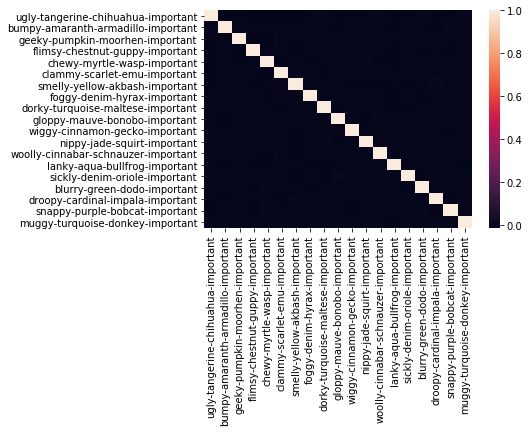

In [0]:
sns.heatmap(train[colnames[colnames.Col4=='important'].index].corr())

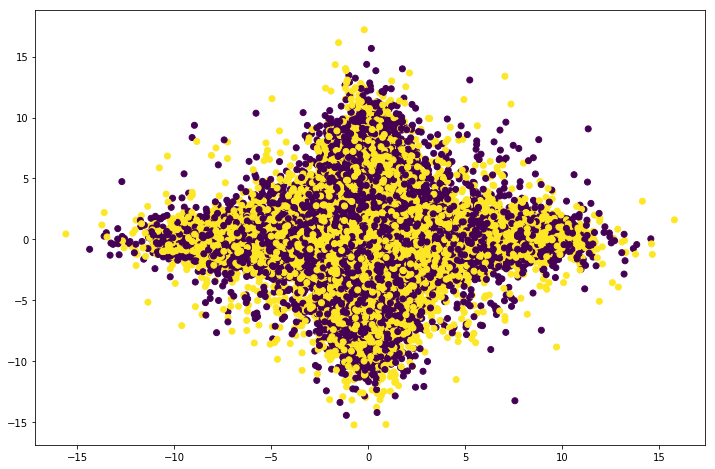

In [0]:
plt.figure(figsize=[12,8])
plt.scatter(train[train.columns[1]], train[train.columns[3]], c=train.target)

# Summary Of Instant Gratification

1) Few words have occurred more in column names such as entropy, important etc.

2) Data appears to be normally distributed.

3) No correlation is found between the columns

4)The col names show an interesting pattern with the first part signifying adjectives, second is color, third is the animal and fourth is the metaphor.

5) Equal distirbution of target variables.

6) The target variable has a uniform relation with the predictor variables and hence a steady pattern emerges

In [0]:
from sklearn import model_selection

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [0]:
gb=GaussianNB()
knn=KNeighborsClassifier()
bgc=BaggingClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgbc=XGBClassifier()

In [0]:
models = []
#models.append(('Decision Tree Classifier', dtree))
#models.append(('Random Forrest Classifer', rf))
#models.append(('Naive Bayes Classifer', gb))
#models.append(('K Nearest Neighbors Classifer', knn))
#models.append(('Bagging Classifer', bgc))
#models.append(('Ada Boost Classifer', abc))
#models.append(('Gradient Boosting Classifer', gbc))
#models.append((' XG Boost Classifer', xgbc))

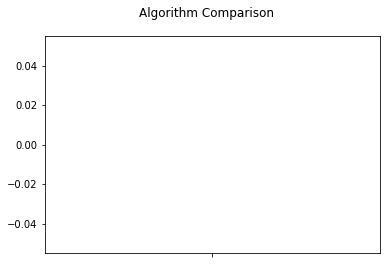

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=123)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison                                  Decision Tree Classifier: 0.500107 (0.000005)      Random Forrest Classifer: 0.502422 (0.000000)
fig = plt.figure()                                             # Naive Bayes Classifer: 0.504601 (0.000007)         K Nearest Neighbors Classifer: 0.505482 (0.000008)                                                             # 
fig.suptitle('Algorithm Comparison')                           # Bagging Classifer: 0.501709 (0.000001)             Ada Boost Classifer: 0.504860 (0.000005)
ax = fig.add_subplot(111)                                      #Gradient Boosting Classifer: 0.507664 (0.000002)    XG Boost Classifer: 0.507557 (0.000004)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

# Using Grid Search and Randomized Search

In [0]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [0]:
#parameters={'criterion':['gini','entropy'],'max_depth': np.arange(1,50)}
#G=GridSearchCV(dtree,parameters,cv=5,scoring='accuracy')
#G.fit(x,y)

In [0]:
#G.best_params_

In [0]:
#dtree1=DecisionTreeClassifier(criterion='entropy',max_depth=17)

In [0]:
parameters={'n_neighbors':np.arange(1,10),
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
G1=GridSearchCV(knn,parameters,cv=5,scoring='accuracy')
G1.fit(x,y)

In [0]:
models1 = []
#models1.append(('Decision Tree Classifier', dtree1))

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models1:
	kfold = model_selection.KFold(n_splits=5,random_state=123)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison                                  Decision Tree Classifier: 0.504807 (0.000004)      Random Forrest Classifer: 0.502422 (0.000000)
fig = plt.figure()                                             # Naive Bayes Classifer: 0.504601 (0.000007)         K Nearest Neighbors Classifer: 0.505482 (0.000008)                                                             # 
fig.suptitle('Algorithm Comparison')                           # Bagging Classifer: 0.501709 (0.000001)             Ada Boost Classifer: 0.504860 (0.000005)
ax = fig.add_subplot(111)                                      #Gradient Boosting Classifer: 0.507664 (0.000002)    XG Boost Classifer: 0.507557 (0.000004)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()